<a href="https://colab.research.google.com/github/yoshinaga2904/Bootcamp-Alura/blob/main/Modulo_2_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import matplotlib.pyplot as plt


In [159]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [160]:
ordenado_por_total = dados.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.set_index("Unidade da Federação")
ordenado_por_total.index = ordenado_por_total.index.str[3:]
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,19904.67,-,19442.14,-,34523.06,14672.77,34569.76,37331.15,19904.67,38882.55,75358.43,16133.26,2750.47,859884.95,1675816.64,1398817.11,18977.88,-,167713.68,149751.54,54437.07,54469.76,19904.67,80286.48,20502.61,167831.88,93218.69,26313.79,18668.53,1267.55,19169.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95
Minas Gerais,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3590.36,4629.85,-,261.08,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
Paraná,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3093.72,-,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16
Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,873.76,...,95149948.63,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38
Rio de Janeiro,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2361.04,2989.25,2408.35,-,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,8114669

In [161]:
mes_mais_recente = ordenado_por_total.columns[-2]
mes_mais_recente

'2020/Jul'

In [162]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           282709570.31
Minas Gerais        120467187.34
Paraná               80320852.69
Rio Grande do Sul    78929703.81
Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

In [163]:
pd.options.display.float_format = "{:.2f}".format

In [164]:
gastos_do_mais_recente

Unidade da Federação
São Paulo             282709570.31
Minas Gerais          120467187.34
Paraná                 80320852.69
Rio Grande do Sul      78929703.81
Rio de Janeiro         71540227.33
Bahia                  58898100.40
Pernambuco             62325444.34
Santa Catarina         51764534.76
Ceará                  30809221.22
Goiás                  33499284.38
Pará                   27618727.51
Maranhão               24374205.15
Espírito Santo         27460475.47
Rio Grande do Norte    19593057.45
Paraíba                15491469.06
Distrito Federal       22233542.26
Mato Grosso do Sul     12508717.35
Piauí                  18019214.49
Alagoas                13087850.40
Mato Grosso            13083151.70
Amazonas               13358514.02
Sergipe                 3312766.32
Tocantins               4489665.87
Rondônia                7407388.24
Acre                    1163813.08
Roraima                 2739498.41
Amapá                   2155083.37
Name: 2020/Jul, dtype: float64

# Desafio 01 - aula 1 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

In [165]:
#Utilizarei uma tecnica aprendida no curso de Data Science na Alura, chamada de Web Scraping
#Para a aplicação do web scraping chamarei duas bibliotecas:
#requests: biblioteca para execução de requisições HTTP;
#BeautifulSoup: biblioteca para extração de dados em arquivos HTML e XML;

import requests
from bs4 import BeautifulSoup

In [166]:
#fazer uma requisição GET obter o HTML da página
req = requests.get('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')

#o método 'content' serve para acessar o código da página HTML
content = req.content

In [167]:
#A biblioteca BeautifulSoup é utilizada para extrair uma tabela
#cria uma variável para acessar o documento de forma estruturada de acordo com as tags
#Com o metodo 'find' acessamos a tabela

soup = BeautifulSoup(content, 'html.parser')
tabela = soup.find(name='table')

In [168]:
# antes de utilizar o Pandas para acessar a tabela, devemos converter para string a variavel 'tabela'
tabela_str = str(tabela)

#Lendo o arquivo no Pandas, passando o index da tabela que pretendo acessar
populacao_ibge = pd.read_html(tabela_str)[0]
populacao_ibge

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 279 638,"3,4%",Sérvia (7 114 393)


# Desafio 02 - aula 1 - Neste desafio temos uma série de passos:



*   Padronizar os nomes das colunas
*   Transformar os dados nos tipos corretos
*   Transformar a UF em index



In [169]:
#Padronizar os nomes das colunas
populacao_ibge = populacao_ibge.rename(columns={"Unidade federativa": "UF",
                                                "População": "populacao"})

#removendo colunas que não usaremos
populacao_ibge.drop(columns=['Posição', '% da pop. total', 'País comparável (habitantes)'], inplace=True)

#Transformar os dados nos tipos corretos
populacao_ibge['populacao'] = populacao_ibge["populacao"].str.replace(" ", "").astype(int)

#Transformar a UF em index
populacao_ibge = populacao_ibge.set_index('UF')
populacao_ibge


,populacao
UF,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


In [170]:
#verificando o tipo da variavel 
populacao_ibge.dtypes

populacao    int64
dtype: object

# Desafio 04 - aula 1 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [171]:
#Transformando o gastos mais recente em um DataFrame
gastos_do_mais_recente = pd.DataFrame(gastos_do_mais_recente)
gastos_do_mais_recente.head()

,2020/Jul
Unidade da Federação,
São Paulo,282709570.31
Minas Gerais,120467187.34
Paraná,80320852.69
Rio Grande do Sul,78929703.81
Rio de Janeiro,71540227.33


In [172]:
populacao_ibge.head()

,populacao
UF,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [173]:
#Função de junção entre os dois DataFrames
def uniao(sus, ibge):
  dados_uf = ibge.join(sus)
  return dados_uf

In [174]:
#Aplicando a função
dados = uniao(gastos_do_mais_recente,populacao_ibge)
dados

,populacao,2020/Jul
UF,,
São Paulo,46289333,282709570.31
Minas Gerais,21331292,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69
Rio Grande do Sul,11422973,78929703.81
Pernambuco,9616621,62325444.34
Ceará,9187103,30809221.22
Pará,8690745,27618727.51


# Desafio 01: aula 2 - Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

In [175]:
#criando uma coluna com o total de gasto por habitante
dados['gasto por habitante'] = dados['2020/Jul'] / dados['populacao']
dados.head()

,populacao,2020/Jul,gasto por habitante
UF,,,
São Paulo,46289333,282709570.31,6.11
Minas Gerais,21331292,120467187.34,5.65
Rio de Janeiro,17366189,71540227.33,4.12
Bahia,14930634,58898100.40,3.94
Paraná,11516840,80320852.69,6.97


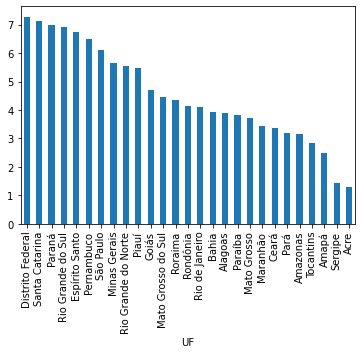

In [176]:
dados['gasto por habitante'].sort_values(ascending=False).plot(kind='bar')

# Desafio 02 - aula 2 - (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.


In [177]:
#selecionar o mês de junho 2020
mes_junho_2020 = ordenado_por_total.columns[-3]

# trazendo todos os valores para cada estado
gastos_junho_2020 = ordenado_por_total[mes_junho_2020]

#inserir uma coluna com valores de junho 2020
dados['2020/jun'] = gastos_junho_2020

#inserir uma coluna com os valores gastos por habitante em junho
dados['gastos por habitante em junho'] = dados['2020/jun'] / dados['populacao']

#Renomeando rotulos colunas
dados.rename({'2020/Jul': 'gastos_2020/julho', 
              'gasto por habitante': 'gastos_por_habitante_2020/jul',
              '2020/jun': 'gastos_2020/junho',
              'gastos por habitante em junho': 'gastos_por_habitante_2020/jun'}, axis=1, inplace=True)


dados

,populacao,gastos_2020/julho,gastos_por_habitante_2020/jul,gastos_2020/junho,gastos_por_habitante_2020/jun
UF,,,,,
São Paulo,46289333,282709570.31,6.11,299060851.62,6.46
Minas Gerais,21331292,120467187.34,5.65,135977571.87,6.37
Rio de Janeiro,17366189,71540227.33,4.12,77604925.21,4.47
Bahia,14930634,58898100.40,3.94,65159300.63,4.36
Paraná,11516840,80320852.69,6.97,92901461.36,8.07
Rio Grande do Sul,11422973,78929703.81,6.91,89019478.82,7.79
Pernambuco,9616621,62325444.34,6.48,68145110.59,7.09
Ceará,9187103,30809221.22,3.35,42146555.81,4.59
Pará,8690745,27618727.51,3.18,35396030.78,4.07


In [178]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   populacao                      27 non-null     int64  
 1   gastos_2020/julho              27 non-null     float64
 2   gastos_por_habitante_2020/jul  27 non-null     float64
 3   gastos_2020/junho              27 non-null     float64
 4   gastos_por_habitante_2020/jun  27 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5+ KB


In [179]:
import seaborn as sns



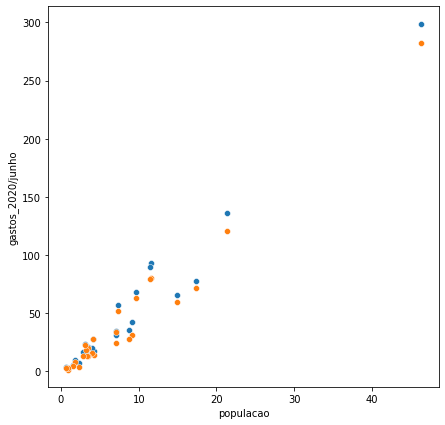

In [180]:
plt.figure(figsize=(7,7))

sns.scatterplot(data=dados / 1000000, x="populacao", y="gastos_2020/junho")
sns.scatterplot(data=dados / 1000000, x="populacao", y="gastos_2020/julho")



Aparentemente os gastos no mês anterior (junho) foram maiores que o mês rescente (julho). Faz sentido pois a tendencia de casos e internações foram diminuindo ao longo dos meses, consequentemente diminuindo os gastos.

# Desafio 01 - aula 3 Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

In [181]:
#separando dados para contrução do gráfico
dados = ordenado_por_total.mean().index.tolist()
usaveis = dados[6:]
mensal = ordenado_por_total[usaveis]
mensal = mensal.T
mensal

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/Mar,276606288.92,147078556.29,114476997.52,84651396.59,73594497.93,70340301.29,59628674.07,56709962.09,46395356.97,34558308.52,34749098.46,28832662.46,26555688.68,20936692.02,17607478.01,19405446.88,17357008.80,15318975.43,15998721.86,14444207.60,14773739.41,9193248.73,7025821.12,7174312.31,2859102.06,2813954.05,2286241.46
2020/Abr,251696362.66,126330649.86,96727112.19,76294596.96,68160773.35,59109689.20,53843729.23,51179993.45,43468816.62,27499307.93,28714969.96,23938156.77,23735724.64,17319947.66,15386630.89,18123899.78,15652772.51,11878587.16,14241361.44,11943713.53,16330913.81,8395906.57,6204453.42,7423678.64,2472063.08,2304961.42,1774558.12
2020/Mai,302857660.98,136867275.75,106103737.62,86076113.42,86281033.16,61756775.71,65424719.40,56843604.33,54200339.48,31870107.62,41248502.78,32979447.97,28614683.75,19916570.52,18970543.57,21437430.22,16703851.10,14175053.45,15254204.31,13981483.29,19441150.53,8450209.57,6732370.56,8581195.13,2383895.48,2910776.44,2701014.87
2020/Jun,299060851.62,135977571.87,92901461.36,89019478.82,77604925.21,65159300.63,68145110.59,56503747.99,42146555.81,34437633.20,35396030.78,31128144.66,27450865.16,20219961.81,19666096.87,23479773.03,15838659.34,15375523.59,14278872.07,14585009.42,17509334.66,6705923.03,5018138.13,9193593.76,2199920.70,3216466.51,2699492.23


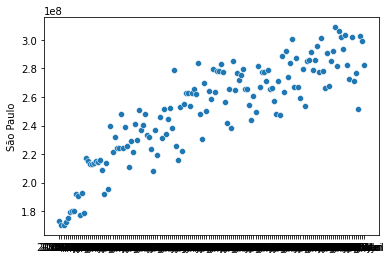

In [182]:
sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")

# Desafio 02 aula 3 - Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

In [183]:
import matplotlib.ticker as ticker

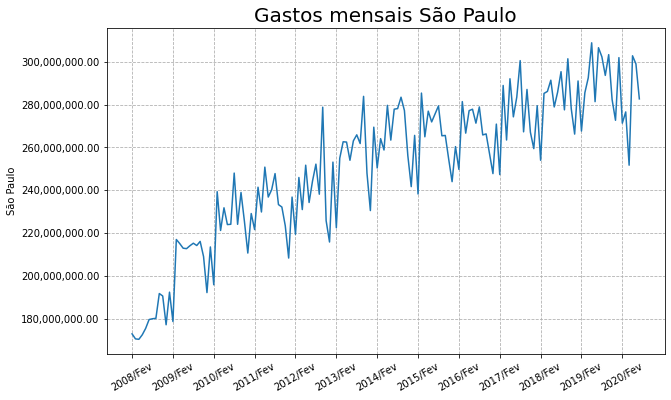

In [184]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.title('Gastos mensais São Paulo', fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(linestyle="--")
plt.show()

# Desafio 02 - aula 4 - Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [185]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


In [186]:
#transformando o index em datetime
from datetime import date

meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


In [187]:
#utilizar o melt para organizar o DataFrame
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172834914.73
1,2008-03-01,São Paulo,170481849.56
2,2008-04-01,São Paulo,170278285.95
3,2008-05-01,São Paulo,172402180.59
4,2008-06-01,São Paulo,175416595.83


In [188]:
#Utilizando metodo pivot para remodelar o DataFrame
mensal_remodelado = mensal_aberto.pivot(index='dia_mes_ano', columns='uf', values='gasto')
mensal_remodelado

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
dia_mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1743978.66,8112220.30,1275063.72,7934652.10,33410124.06,27643304.86,10215956.80,10032886.43,18149374.27,13452263.93,7929894.93,8279288.79,70301089.50,48855046.46,10871589.62,20126081.01,26222079.10,9711680.20,9110108.87,45897704.82,44122593.19,1940792.63,771687.83,24409572.92,4636850.76,172834914.73,5051932.07
2008-03-01,2057439.02,9210505.56,1177745.93,8641517.13,41301703.40,30085370.22,11627918.26,12262049.08,20992213.03,14750895.33,9416367.68,9793888.78,79119005.51,55611791.07,12348758.14,22149375.82,30716361.81,10428191.09,10126626.54,52928695.92,42892665.52,1955721.68,876091.18,27483480.50,5017838.07,170481849.56,5200151.87
2008-04-01,2057829.69,10466691.94,1396371.51,8531576.49,42826993.62,31376221.00,11922015.36,12453466.98,21049477.30,15148647.11,9390588.03,8997542.75,79046322.41,56115135.82,12680965.13,23436682.75,30589332.79,10227943.00,10964234.85,51972416.77,45295962.86,2143353.81,896952.53,27806641.44,5265951.03,170278285.95,5343714.73
2008-05-01,2226577.93,9844096.03,1411520.77,9079902.15,42071294.17,31189904.62,11900817.00,11789786.09,19162546.79,14543679.92,9378197.25,9842108.59,79268070.12,55574831.93,13258411.71,23861080.80,31409553.23,10562148.66,11032871.23,51679350.79,43951349.46,2280382.58,1027288.73,28354279.52,5367094.94,172402180.59,5344487.99
2008-06-01,2112576.82,10288668.11,1420892.01,8646295.77,39910042.40,29463965.11,11969271.76,11889687.35,20332533.92,14553978.06,9450300.60,10257782.00,79608652.53,56094754.74,12246686.33,23502915.90,28947510.92,10465088.93,10450599.08,53759674.01,44102925.77,2624542.97,938293.54,28993292.76,4981036.36,175416595.83,5398413.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,2859102.06,15998721.86,2286241.46,14773739.41,70340301.29,46395356.97,19405446.88,26555688.68,34558308.52,28832662.46,14444207.60,17357008.80,147078556.29,114476997.52,17607478.01,34749098.46,59628674.07,15318975.43,20936692.02,84651396.59,73594497.93,7174312.31,2813954.05,56709962.09,9193248.73,276606288.92,7025821.12
2020-04-01,2472063.08,14241361.44,1774558.12,16330913.81,59109689.20,43468816.62,18123899.78,23735724.64,27499307.93,23938156.77,11943713.53,15652772.51,126330649.86,96727112.19,15386630.89,28714969.96,53843729.23,11878587.16,17319947.66,76294596.96,68160773.35,7423678.64,2304961.42,51179993.45,8395906.57,251696362.66,6204453.42
2020-05-01,2383895.48,15254204.31,2701014.87,19441150.53,61756775.71,54200339.48,21437430.22,28614683.75,31870107.62,32979447.97,13981483.29,16703851.10,136867275.75,106103737.62,18970543.57,41248502.78,65424719.40,14175053.45,19916570.52,86076113.42,86281033.16,8581195.13,2910776.44,56843604.33,8450209.57,302857660.98,6732370.56


# Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados.

Mude a palete de cores.

Posicione a legenda de forma mais adequada.

Adicione título principal e nos eixos x e y.

In [203]:
mensal_cinco_uf = mensal_aberto.query('uf in ["Tocantins", "Rondônia",	"Acre", "Roraima", "Amapá"]' )
mensal_cinco_uf

,dia_mes_ano,uf,gasto
3300,2008-02-01,Tocantins,5051932.07
3301,2008-03-01,Tocantins,5200151.87
3302,2008-04-01,Tocantins,5343714.73
3303,2008-05-01,Tocantins,5344487.99
3304,2008-06-01,Tocantins,5398413.09
...,...,...,...
4045,2020-03-01,Amapá,2286241.46
4046,2020-04-01,Amapá,1774558.12
4047,2020-05-01,Amapá,2701014.87
4048,2020-06-01,Amapá,2699492.23


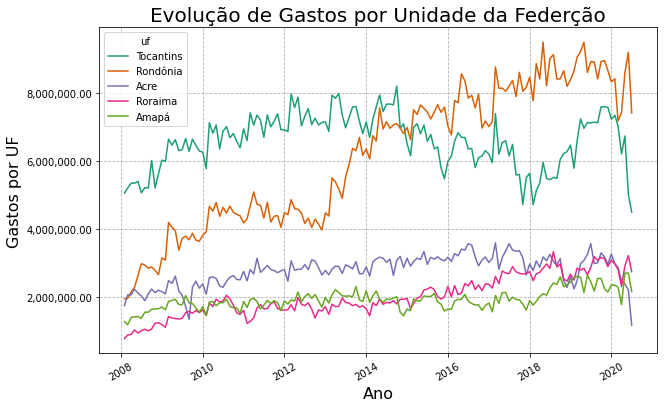

In [228]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_cinco_uf, x="dia_mes_ano", y="gasto",hue='uf', palette='Dark2')

plt.xticks(rotation=30)
plt.title('Evolução de Gastos por Unidade da Federção', fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xlabel("Ano", size = 16)
plt.ylabel("Gastos por UF", size = 16)
plt.grid(linestyle="--")
plt.show()